# Building Basic Recommendation System

In [1]:
import pandas as pd
import numpy as np


In [2]:
credits=pd.read_csv(r"C:\Users\karth\Downloads\archive (3)\tmdb_5000_credits.csv" )
movies=pd.read_csv(r"C:\Users\karth\Downloads\archive (3)\tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print(credits.shape)
print(movies.shape)

(4803, 4)
(4803, 20)


In [6]:
credits_column_renamed=credits.rename(columns={"movie_id":"id"})
movies_df_merge=movies.merge(credits_column_renamed,on="id")

In [7]:
movies_df_merge.shape

(4803, 23)

In [8]:
movies_df_merge.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [9]:
movies_cleaned=movies_df_merge.drop(['status','homepage','title_x','title_y','production_countries'],axis=1)

In [10]:
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [12]:
v=movies_cleaned["vote_count"]
R= movies_cleaned["vote_average"] 
C=movies_cleaned["vote_average"].mean() 
m=movies_cleaned["vote_count"].quantile(0.70)

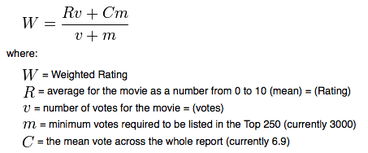

In [13]:
movies_cleaned["Wieghted_average"]=((R*v)+(C*m))/(v+m)

In [14]:
movies_cleaned["Wieghted_average"]

0       7.148013
1       6.807627
2       6.276075
3       7.509565
4       6.098319
          ...   
4798    6.239746
4799    6.090532
4800    6.101451
4801    6.087503
4802    6.097742
Name: Wieghted_average, Length: 4803, dtype: float64

In [15]:
movies_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'Wieghted_average'],
      dtype='object')

In [16]:
movie_ranking=movies_cleaned.sort_values("Wieghted_average",ascending=False)
movie_ranking[['original_title','vote_average','vote_count','Wieghted_average','popularity']]

,original_title,vote_average,vote_count,Wieghted_average,popularity
1881,The Shawshank Redemption,8.5,8205,8.340775,136.747729
3337,The Godfather,8.4,5893,8.192887,143.659698
662,Fight Club,8.3,9413,8.171648,146.757391
3232,Pulp Fiction,8.3,8428,8.157615,121.463076
65,The Dark Knight,8.2,12002,8.102674,187.322927
...,...,...,...,...,...
303,Catwoman,4.2,808,4.991470,32.271938
3746,The Boy Next Door,4.1,1022,4.822053,24.161735
210,Batman & Robin,4.2,1418,4.749951,50.073575
242,Fantastic Four,4.4,2278,4.743880,38.126095


C:\Users\karth\anaconda3\envs\model\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


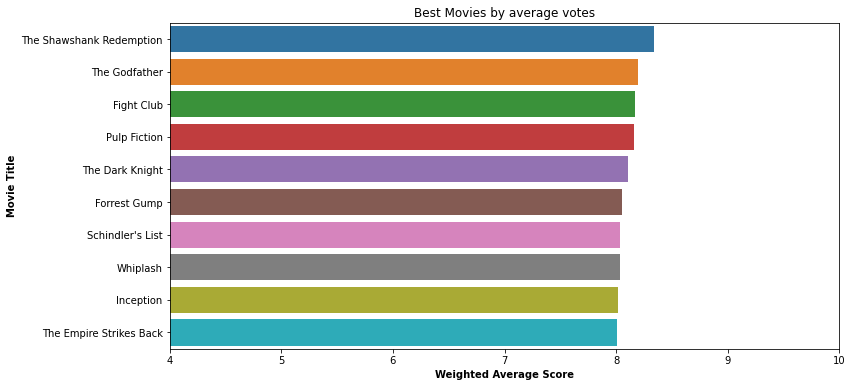

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
movies_avg=movie_ranking.sort_values("Wieghted_average",ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(movies_avg['Wieghted_average'].head(10),movies_avg['original_title'].head(10))
plt.xlim(4,10)
plt.title("Best Movies by average votes")
plt.xlabel("Weighted Average Score",weight="bold")
plt.ylabel("Movie Title",weight="bold")
plt.savefig("best1_Movie.png")

## Based On Popularity

C:\Users\karth\anaconda3\envs\model\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


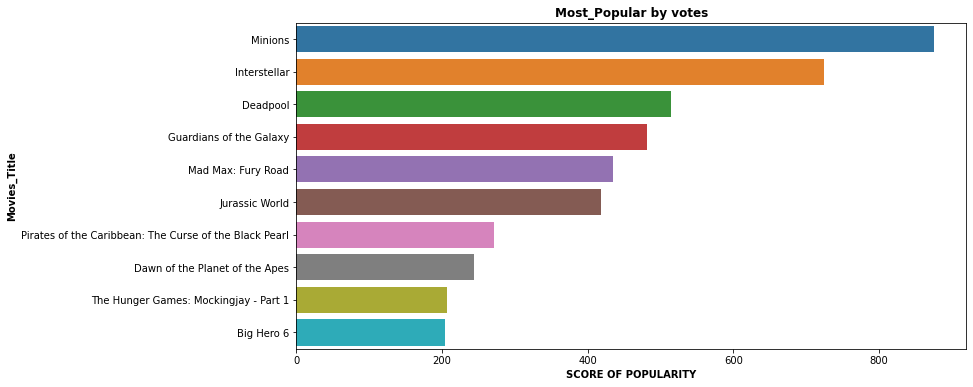

In [19]:
Popularity=movie_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(Popularity["popularity"].head(10),Popularity["original_title"].head(10))
plt.title('Most_Popular by votes',weight="bold")
plt.xlabel('SCORE OF POPULARITY',weight="bold")
plt.ylabel("Movies_Title",weight="bold")
plt.savefig('best_popular_movies')

###  Recommendation Based on scaled weight average and popularity score(Priority is given  50% Both)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
movies_scaled=scaler.fit_transform(movie_ranking[["Wieghted_average","popularity"]])
movies_normalized=pd.DataFrame(movies_scaled,columns=["Wieghted_average","popularity"])
movies_normalized.head()

,Wieghted_average,popularity
0,1.000000,0.156179
1,0.959622,0.164074
2,0.953823,0.167611
3,0.949991,0.138723
4,0.934991,0.213941


In [21]:
movies_cleaned[["Normalized_Wieghted_average","Normalized_popularity"]]=movies_normalized

In [22]:
movies_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'Wieghted_average',
       'Normalized_Wieghted_average', 'Normalized_popularity'],
      dtype='object')

In [23]:
movies_cleaned["Equal_popularity_average_score"]=(movies_cleaned['Normalized_Wieghted_average']*.50)+(movies_cleaned["Normalized_popularity"]*.50)

In [24]:
movies_score=movies_cleaned.sort_values(["Equal_popularity_average_score"],ascending=False)

In [26]:
movies_score[['original_title','Normalized_Wieghted_average','Normalized_popularity','Equal_popularity_average_score']]

,original_title,Normalized_Wieghted_average,Normalized_popularity,Equal_popularity_average_score
11,Quantum of Solace,0.906439,0.827162,0.866801
1071,Blended,0.460630,1.000000,0.730315
29,Skyfall,0.851874,0.549462,0.700668
135,The Wolfman,0.725217,0.587690,0.656453
210,Batman & Robin,0.670973,0.495989,0.583481
...,...,...,...,...
4797,Cavite,0.102239,0.006926,0.054583
4800,"Signed, Sealed, Delivered",0.019593,0.057189,0.038391
4799,Newlyweds,0.039279,0.027595,0.033437
4801,Shanghai Calling,0.017935,0.043544,0.030740


C:\Users\karth\anaconda3\envs\model\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


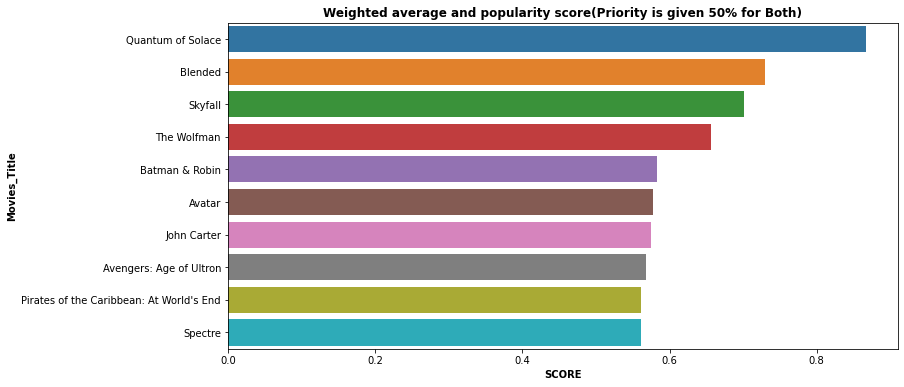

In [30]:

plt.figure(figsize=(12,6))
ax=sns.barplot(movies_score["Equal_popularity_average_score"].head(10),movies_score["original_title"].head(10))
plt.title('Weighted average and popularity score(Priority is given 50% for Both)',weight="bold")
plt.xlabel('SCORE',weight="bold")
plt.ylabel("Movies_Title",weight="bold")
plt.savefig('Equal_popularity_score.png')